# SciPy

## 1-1. SciPy란?
- 과학 및 수학 문제를 해결하는 데 사용되는 오픈 소스 Python 라이브러리
- NumPy 확장을 기반으로 개발됨 (SciPy를 import 할 경우 따로 NumPy를 import 하지 않아도 됨)
- 사용자가 다양한 고급 명령으로 데이터를 조작하고 시각화 할 수 있도록 지원함

## 1-2. NumPy vs SciPy
- NumPy와 SciPy는 모두 수학 및 수치 분석에 사용되는 Python 라이브러리
- NumPy
 - 배열 데이터와 정렬, 인덱싱 등과 같은 기본 작업을 포함
 - 선형 대수, 푸리에 변환 등을 해결하는 데 도움이 될 수있는 여러 함수를 제공
- SciPy
 - 전체가 수치 계산을 위한 기능 코드로 구성됨
 - 선형 대수, 푸리에 변환 등의 다양한 수식을 실제로 구현한 기능들과 다른 많은 기능을 함께 포함하는 라이브러리
- Python을 사용하여 과학적 분석을 수행하는 경우 SciPy가 NumPy를 기반으로 빌드되므로 NumPy와 SciPy를 모두 설치해야 함 (import는 SciPy만 해도 되지만 설치는 모두 해 주어야 함)

## 1-3. SciPy의 하위 패키지
- cluster : 클러스터링 알고리즘
- constants : 물리 및 수학 상수
- fftpack : 고속 푸리에 변환 루틴
- integrate : 적분 및 일반 미분 방정식 계산 기능
- interpolate : 보간 및 스플라인 평활화
- io : 입력 및 출력
- linalg : 선형 대수학
- ndimage : N차원 이미지 처리
- odr : 직교 거리 회귀
- optimize : 최적화 및 루트 찾기 루틴
- signal : 신호 처리
- sparse : 희소 행렬 및 관련 루틴
- spatial : 공간 데이터 구조 및 알고리즘
- special : 특수 기능
- stats : 통계 분포 및 함수 

## 1-4. SciPy의 사용 예

In [ ]:
from scipy import special

### (1) 지수 및 삼각함수

In [ ]:
a = special.exp10(3)
print("10의 3제곱 = {}".format(a))
b = special.exp2(3)
print("2의 3제곱 = {}".format(b))
c = special.sindg(90)
print("sine 90˚= {}".format(c))
d = special.cosdg(45)
print("cosine 45˚= {}".format(d))

10의 3제곱 = 1000.0
2의 3제곱 = 8.0
sine 90˚= 1.0
cosine 45˚= 0.7071067811865475


### (2) Factorial (계수) 계산

In [ ]:
e = special.factorial(10)
print("10의 계수 = {}".format(e))

10의 계수 = 3628800.0


### (3) 순열 및 조합

In [ ]:
f = special.perm(6, 2)
print("순열(6, 2)= {}".format(f))
g = special.comb(6, 2, repetition=True)
print("조합(6, 2)= {}".format(g))

순열(6, 2)= 30.0
조합(6, 2)= 21.0


### (4) 빠른 푸리에 변환
- 시간이나 공간에 대한 함수를 시간 또는 공간 주파수 성분으로 분해하는 변환
- 주기신호 뿐만 아니라 비주기신호까지 통합하여 파동을 해석 가능하도록 돕는 수식

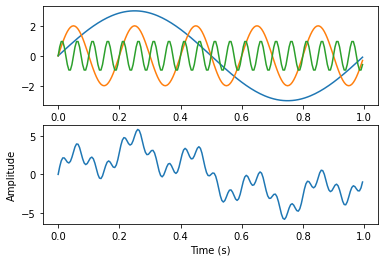

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

freq_samp = 100

#Time
t = np.linspace(0, 1, freq_samp*2, endpoint = False )

#Frequencies
f1, f2, f3 = 1, 5, 20

#Amplitudes
A1, A2, A3 = 3, 2, 1
x1 = A1*np.sin(f1*2*np.pi*t)
x2 = A2*np.sin(f2*2*np.pi*t)
x3 = A3*np.sin(f3*2*np.pi*t)

#Sum of waves
x = x1+x2+x3

plt.subplot(2,1,1)
plt.plot(t,x1,t,x2,t,x3)
plt.subplot(2,1,2)
plt.plot(t,x)
plt.xlabel('Time (s)')
plt.ylabel('Amplitude');

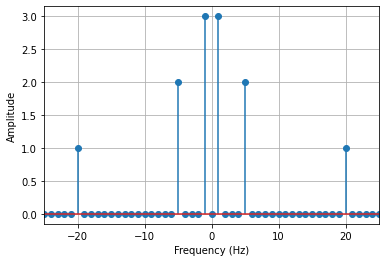

In [ ]:
from scipy import fftpack

A = fftpack.fft(x)
freq = fftpack.fftfreq(len(x))*freq_samp*2

plt.stem(freq,np.abs(A)/freq_samp,use_line_collection=True)
plt.xlim(-25,25)
plt.xlabel('Frequency (Hz)')
plt.ylabel('Amplitude')
plt.grid()

### (5) 신호 처리 기능

Text(0.5, 0, 'Time (s)')

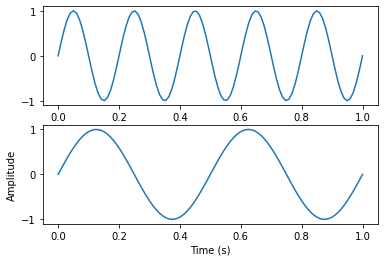

In [ ]:
import scipy.signal as signal
import numpy as np
import matplotlib.pyplot as plt

#Time
t = np.linspace(0,1,100)

#Frequency
f1, f2 = 5, 2

#Two signals of different frequencies
first_signal = np.sin(f1*2*np.pi*t)
second_signal = np.sin(f2*2*np.pi*t)

#Plotting both signals
plt.subplot(2,1,1)
plt.plot(t, first_signal)
plt.subplot(2,1,2)
plt.plot(t, second_signal)
plt.ylabel('Amplitude')
plt.xlabel('Time (s)')

Text(0, 0.5, 'Amplitude')

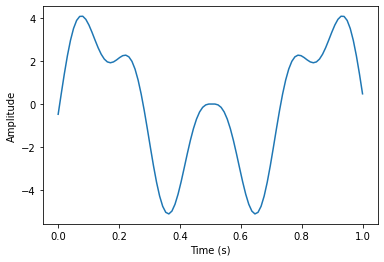

In [ ]:
from scipy import signal

#Convolving two signals
convolution = signal.convolve(first_signal, second_signal, mode='same')

#Plotting the result
plt.plot(t, convolution)
plt.xlabel('Time (s)')
plt.ylabel('Amplitude')

### (6) 보간 기능
- 보간은 수치 분석 필드에서 두 점 사이의 값을 일반화하는 데 사용

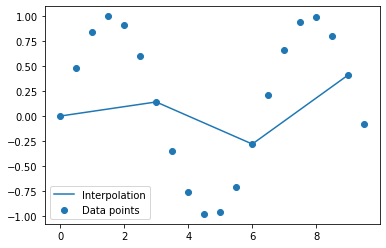

In [ ]:
from scipy import interpolate
import numpy as np

#Create toy data
x = np.arange(0,10,0.5)
y = np.sin(x)

#Interpolate
f = interpolate.interp1d(x, y)

#Create interpolation function
x_i = np.arange(0,10,3)
y_i = f(x_i)

#Plot results
plt.scatter(x,y)
plt.plot(x_i, y_i)
plt.legend(['Interpolation', 'Data points'])

### (7) 선형대수 : 역행렬

In [ ]:
import numpy as np

#Generate a 2D array
A = np.array([[1,2],[3,4]])

from scipy import linalg

#Calculate the inverse matrix
linalg.inv(A)

array([[-2. ,  1. ],
       [ 1.5, -0.5]])

### (8) 보로노이 다이어그램
- 공간 데이터 구조는 점, 선 및 표면으로 만들어진 개체
- SciPy는 많은 과학 분야에 적용되기 때문에 공간 데이터 구조에 대한 알고리즘을 보유함
- 보로노이 다이어그램이란? 평면을 특정 점까지의 거리가 가장 가까운 점의 집합으로 분할한 그림
- 1854년 런던에 창궐했던 콜레라의 원인을 추적하는 과정에서 의사였던 존 스노우(John Snow)가 사용. 그는 당시 런던에 있던 식수 펌프의 위치를 기준점으로 설정하고 콜레라 발생을 관찰한 결과, 브로드 거리 콜레라 희생자의 대다수가 가장 가까운 식수 펌프의 물을 이용했다는 것을 알아냈다.

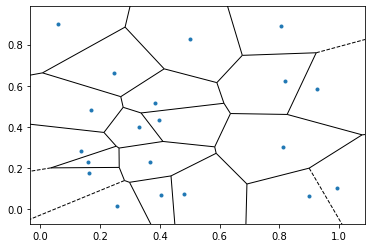

In [ ]:
from scipy.spatial import Voronoi
import numpy as np

points = np.random.rand(20,2)
voronoi = Voronoi(points)

from scipy.spatial import voronoi_plot_2d
fig = voronoi_plot_2d(voronoi,show_vertices=False)